<a href="https://colab.research.google.com/github/Krishna4123/amdl/blob/main/stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    accuracy_score
)

In [ ]:
df = pd.read_csv("portfolio_data.csv")
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date").reset_index(drop=True)

stocks = ["AMZN", "DPZ", "BTC", "NFLX"]
results = []

plt.figure(figsize=(15, 12))
plot_index = 1

<Figure size 1500x1200 with 0 Axes>

In [ ]:
for stock in stocks:
    print("\n==============================")
    print(f"Training model for: {stock}")
    print("==============================")

    series = df[stock].astype(float)

    # Lag-1 feature
    X = series.shift(1).dropna().values.reshape(-1, 1)
    y = series[1:].values

    # 80-20 split
    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    # -----------------------------
    # Linear Regression
    # -----------------------------
    lin_model = LinearRegression()
    lin_model.fit(X_train, y_train)
    lin_pred = lin_model.predict(X_test)

    # Metrics
    lin_mse = mean_squared_error(y_test, lin_pred)
    lin_rmse = np.sqrt(lin_mse)
    lin_mae = mean_absolute_error(y_test, lin_pred)
    lin_r2 = r2_score(y_test, lin_pred)

    # Direction accuracy (up/down)
    lin_acc = accuracy_score(
        np.sign(np.diff(y_test)),
        np.sign(np.diff(lin_pred))
    )



Training model for: AMZN

Training model for: DPZ

Training model for: BTC

Training model for: NFLX


In [ ]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_pred = poly_model.predict(X_test_poly)

    # Metrics
poly_mse = mean_squared_error(y_test, poly_pred)
poly_rmse = np.sqrt(poly_mse)
poly_mae = mean_absolute_error(y_test, poly_pred)
poly_r2 = r2_score(y_test, poly_pred)
poly_acc = accuracy_score(
    np.sign(np.diff(y_test)),
    np.sign(np.diff(poly_pred))
)

    # Save in results table
results.append({
        "Stock": stock,
        "Linear_RMSE": lin_rmse,
        "Poly_RMSE": poly_rmse,
        "Linear_R2": lin_r2,
        "Poly_R2": poly_r2,
        "Linear_Accuracy": lin_acc,
        "Poly_Accuracy": poly_acc
})

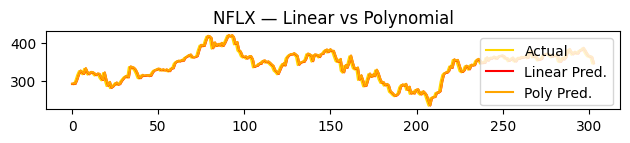

In [ ]:
plt.subplot(4, 1, plot_index)
plt.plot(y_test, label="Actual", color='gold')
plt.plot(lin_pred, label="Linear Pred.", color='red')
plt.plot(poly_pred, label="Poly Pred.", color='orange')
plt.title(f"{stock} — Linear vs Polynomial")
plt.legend()
plot_index += 1

plt.tight_layout()
plt.show()

In [ ]:
results_df = pd.DataFrame(results)
print("\n===== MODEL PERFORMANCE =====")
print(results_df)


===== MODEL PERFORMANCE =====
  Stock  Linear_RMSE  Poly_RMSE  Linear_R2   Poly_R2  Linear_Accuracy  \
0  NFLX     9.023669   9.146037   0.939928  0.938287         0.452145   

   Poly_Accuracy  
0       0.452145  


In [ ]:
print("\n==============================")
print("  FUTURE PRICE PREDICTION")
print("==============================\n")

user_stock = input("Enter stock name (AMZN / DPZ / BTC / NFLX): ").upper()

if user_stock not in stocks:
    print("Invalid stock name.")
else:
    last_price = float(input(f"Enter yesterday's price for {user_stock}: "))

    # Linear prediction
    lin_future = lin_model.predict([[last_price]])

    # Polynomial prediction
    poly_future = poly_model.predict(poly.transform([[last_price]]))

    print(f"\nPredicted next-day price of {user_stock}:")
    print(f"Linear Regression Prediction   : {lin_future[0]:.2f}")
    print(f"Polynomial Regression Prediction: {poly_future[0]:.2f}")


  FUTURE PRICE PREDICTION

Enter stock name (AMZN / DPZ / BTC / NFLX): AMZN
Enter yesterday's price for AMZN: 234

Predicted next-day price of AMZN:
Linear Regression Prediction   : 234.66
Polynomial Regression Prediction: 235.03
